In [1]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

In [2]:
## Loading Scikit-Learn dataset and converting to Pandas
boston = load_boston()
boston_ = pd.DataFrame(boston.data, columns=boston.feature_names)
x_train, x_test = boston_[:400], boston_[400:]
y_train, y_test = boston.target[:400], boston.target[400:]


In [3]:
# XGBoostモデル作成
reg = xgb.XGBRegressor()
## ちなみにできることは Regression, Classification, Rankが可能

In [4]:
# Hyper parameter optimization
parameters = {'max_depth': [2,4,6], 'n_estimators': [50,100,200]}
reg_cv = GridSearchCV(reg, parameters, verbose=1)
reg_cv.fit(x_train, y_train)
print(reg_cv.best_params_, reg_cv.best_score_)

/Users/kosukekikuchi/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits
{'max_depth': 4, 'n_estimators': 50} 0.6964435313115626


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    1.3s finished
/Users/kosukekikuchi/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [5]:
reg = xgb.XGBRegressor(**reg_cv.best_params_)
reg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [6]:
pred_train = reg.predict(x_train)
pred_test = reg.predict(x_test)
print(mean_squared_error(y_train, pred_train))
print(mean_squared_error(y_test, pred_test))


2.0515461546856955
17.275614341128005


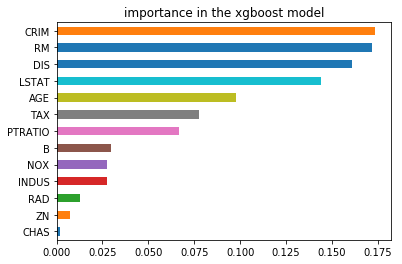

In [7]:
importances = pd.Series(reg.feature_importances_, index = boston.feature_names)
importances = importances.sort_values()
importances.plot(kind="barh")
plt.title("importance in the xgboost model")
plt.show()